# Classification Analysis: D209 Task 1

## **Medical Readmission**

### Natalie Toler

## Table of Contents
### Part 1. Research Question
#### A1. Research Question
#### A2. Objective and Goals

### Part 2. Method Justificaiton
#### B1. K Nearest Neighbors
#### B2. Assumption
#### B3. Packages and Libraries 

### Part 3. Data Preparation
#### C1. Preprocessing
#### C2. Variables
#### C3. Data Preparation
#### C4. Copy of Cleaned Data

### Part 4. Analysis
#### D1. Test and Training Split
#### D2. Analysis Test
#### D3. Classification Analysis Code

### Part 5. Data Summary and Implications
#### E1. Accuracy of Model
#### E2. Results and Implications
#### E3. Limitations
#### E4. Course of Action

### Part 6. Data Summary and Implications
#### F. Panopto Video

### Sources
#### G. Web Sources
#### H. Source references

## Part 1

### A1. Research Question

For this project I will continue the exploration that I started in D208, looking at which variables affect the readmission of a patient. Using a logistic regression I found that there were no statistically significant variables that caused readmission for a patient and there were only three variables that had any affect on readmission. Therefore for this porject I want to use a different model to test the readmission rates. Therefore the research question I will be answering is: **Which variables, if any, affect the readmission rate for patients?**

### A2. Objective and Goals

The goal of this analysis is to see if a better model can shed light on readmission to hospital. While the logistic Regression model didn't show statistical significance in the variables affecting readmission rates there were so many limitations to the model that it isn't clear if the data or the model are the issue. Therefore testing the same research question with a new model will help to clarify. The importance of figuring out which factors play a roll in readmission to hospital is multifaceted. First of all knowing when a patient arrives at hospital if they present with variables that affect readmission will allow the care team to mitigate those variables in hopes to avoid the readmission. Secondly, readmission costs money for both the hospital and the patients so figuring out why readmission occurs will allow hospitals to put resources to those causes. 

## Part 2

### B1. K Nearest Neighbors Classification Model

The K nearest neighbors, also known as KNN, method of classification maps each data point based on the predictor variables so that when a new unknown data point is added the model will look at the 'K' closest known data points and assign the unknown data point based on the known data around it. 'K' in this being some integer that best fits the data. In the case of hospital readmission we will be trying to classify new rows as readission or not based on where the predictor variables places the unknown set in relation to the known data. When selecting a 'k' it's important to make sure that the model is not over or under fitting. Generally a larger 'k' will cause underfitting while a smaller 'k' will cause overfitting. In order to test for a correct value of 'k' we can loop the model through multiple 'k''s and chart the accuracies from each iteration. There we can find the correct value of 'k' for the data. 

### B2. Assumption

In order for the KNN classification model to work our data has to meet certain assumptions. Arguably one of the most important assumptions that the data must meet for the KNN model to work is that similar things fall near each other in the feature space. This is important because the KNN model uses nearby datapoints to label unknown data and to classify the unknown there has to be a majority grouping or else the model is nothing more than random guessing. [Its All About Assumptions](https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d)

### B3. Packages and Libraries

For this project I will be using python. Python is a great programming language for data analysis because of it's sandbox nature and the ability to import packages and libraries for each specific project. For this project I will be primarily using the SciKit-learn library as well as the standard data analysis packages.

 - pandas for handling the dataset
 - NumPy for performing certain operations and assignments of categories to the values
 - Seaborn and MatPlotLib for charting
 - sklearn which will handle the functions of the model and the subsequent measurements.
     including: 
     - KNeighborsClassifier for the KNN test
     - train_test_split for spliting the data
     - GridSearchCV for determining the best 'k'
     - confusionMatrix for printing the confusion matrix
     - roc_auc_score for creating the area under the curve score
     - roc_curve for plotting the ROC curve
     - classification_report for a summart of the metrics
     - SelectKBest, f_classif to determine the best features for the model

In [1]:
# Import the libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Import the dataset CSV
df = pd.read_csv('medical_clean.csv', index_col=0)

# Check the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

## Part 3. Data Preparation

### C1. Preprocessing

One of the other important assumptions of the KNN model is that the variables are stored as integers. Since this is not the case for most of the variables in this dataset the biggest processing will be to use one hot encoding to transform all of the categorical variables to numerical values. For the binary columns this will be an easy fix of transforming the yes and no values to 1/0 values. However for the variables that have more than two values we will use the one hot encoding method which creates dummy variables for each of the values and uses 1/0 to indicate whether the value is present or not. [Categorical Predictors](https://www.bzst.com/2015/08/categorical-predictors-how-many-dummies.html)

Since there are no nulls in the dataset this will be the only preprocessing that is directly relevant to the KNN model working. However I will also be renaming the columns to be pythonic standard for ease of use and I will standardize the numeric data which will make a better model.

### C2. Variables

Since the purpose of this model is to test my research question from D208 in a different method I will be using the same variables as I used in my D208 project. These are: 

**Dependent Variable**
- **Readmission**
    - **Binary Categorical**

**Independent Variables**

**Numeric Variables**
- *Discrete*
    - Age
    - Initial Days
- *Continuous*
    - Income
    - Vitamin D Levels
    - Total Charge
    
**Categorical**
- *Binary*
    - High Blood Pressure
    - Stroke
    - Overweight
    - Arthritis
    - Diabetes
    - Back Pain
    - Anxiety
    - Allergic Rhinitis
    - Reflux Esophagitis
    - Asthma
- *Ordinal*
    - Complication Risk
- *Nominal*
    - Area
    - Maritial Status
    - Gender
    - Initial Admission
    - Services

### C3. Data Preparation

In [2]:
# Drop any Variables that aren't being used
df_clean = df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population',
              'TimeZone', 'Job', 'Children', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
              'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
             axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxiety  

In [3]:
# Encode the binary columns to 1/0
binary_columns = ['ReAdmis', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
                 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
binary_encoding = {'Yes': 1, 'No': 0}
for col in binary_columns:
    df_clean[col] = df_clean[col].replace(binary_encoding)
df_clean.value_counts().sum()

C:\Users\natal\AppData\Local\Temp\ipykernel_7976\2783163107.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(binary_encoding)


10000

In [4]:
# Encode the Ordinal Categorical Variable to 1, 2, 3 for Low, medium, high
risk_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
# Map the values in the "complication_risk" column using the defined mapping
df_clean['Complication_risk'] = df_clean['Complication_risk'].map(risk_mapping)
# Convert to int type
df_clean['Complication_risk'] = df_clean['Complication_risk'].astype(int)

In [5]:
#One Hot encoding for nominal categorical
categorical_columns = ['Area', 'Marital', 'Gender', 'Initial_admin', 'Services']
df_clean = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=False)

df_clean = df_clean.astype(int)

In [6]:
# Isolate continuous variables to normalize the data
continuous_columns = ['Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df_clean[continuous_columns] = scaler.fit_transform(df_clean[continuous_columns])

In [7]:
# Check the DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  float64
 1   Income                               10000 non-null  float64
 2   ReAdmis                              10000 non-null  int32  
 3   VitD_levels                          10000 non-null  float64
 4   HighBlood                            10000 non-null  int32  
 5   Stroke                               10000 non-null  int32  
 6   Complication_risk                    10000 non-null  int32  
 7   Overweight                           10000 non-null  int32  
 8   Arthritis                            10000 non-null  int32  
 9   Diabetes                             10000 non-null  int32  
 10  Hyperlipidemia                       10000 non-null  int32  
 11  BackPain                         

In [8]:
# Rename the Columns
pythonic_columns = ['age', 'income', 'readmission', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight',
                   'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis',
                   'asthma', 'initial_days', 'total_charge', 'area_rural', 'area_suburban', 'area_urban', 'marital_divorced',
                   'marital_married', 'marital_never', 'marital_seperated', 'marital_widowed', 'gender_female',
                   'gender_male', 'gender_nonbinary', 'initial_admin_elective', 'initial_admin_emergency',
                   'initial_admin_observation', 'services_blood_work', 'services_ct', 'services_iv', 'services_mri']
df_clean = df_clean.set_axis(pythonic_columns, axis=1)

In [9]:
# Check the Dataframe
df_clean.head()

,age,income,readmission,vit_d,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,...,gender_female,gender_male,gender_nonbinary,initial_admin_elective,initial_admin_emergency,initial_admin_observation,services_blood_work,services_ct,services_iv,services_mri
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,-0.024795,1.615899,0,0.754215,1,0,2,0,1,1,...,0,1,0,0,1,0,1,0,0,0
2,-0.121706,0.221426,0,0.264083,1,0,3,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.024795,-0.915857,0,0.264083,1,0,2,1,0,1,...,1,0,0,1,0,0,1,0,0,0
4,1.186592,-0.026263,0,-0.716180,0,1,2,0,1,0,...,0,1,0,1,0,0,1,0,0,0
5,-1.526914,-1.377327,0,-0.226049,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [10]:
df_clean.shape

(10000, 36)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        10000 non-null  float64
 1   income                     10000 non-null  float64
 2   readmission                10000 non-null  int32  
 3   vit_d                      10000 non-null  float64
 4   high_blood                 10000 non-null  int32  
 5   stroke                     10000 non-null  int32  
 6   complication_risk          10000 non-null  int32  
 7   overweight                 10000 non-null  int32  
 8   arthritis                  10000 non-null  int32  
 9   diabetes                   10000 non-null  int32  
 10  hyperlipidemia             10000 non-null  int32  
 11  back_pain                  10000 non-null  int32  
 12  anxiety                    10000 non-null  int32  
 13  allergic_rhinitis          10000 non-null  int32  


In [12]:
# Split the data into two dataframes, one with all the independent variables and one with only the dependent
df_X = df_clean.drop(['readmission'], axis=1).copy()
df_y = df_clean['readmission'].copy()

In [13]:
# Feature Selection to discover the best independent variables to use in the model
feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(df_X, df_y)
feat_pvals = pd.DataFrame({'Feature':df_X.columns, 'p_value':feat_select.pvalues_}).sort_values('p_value')
feat_pvals[feat_pvals['p_value']<0.05]

,Feature,p_value
16,total_charge,0.000000
15,initial_days,0.000000
32,services_ct,0.014707
20,marital_divorced,0.030143
33,services_iv,0.042233
29,initial_admin_emergency,0.048766


In [14]:
# Using the selected variables check the VIF for multicollinearity.
X = df_clean[['total_charge', 'initial_days', 'services_ct', 'marital_divorced', 'services_iv', 'initial_admin_emergency']]
vif_df=pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]

print(vif_df)

                   feature        VIF
0             total_charge  64.602923
1             initial_days  64.013637
2              services_ct   1.126867
3         marital_divorced   1.177517
4              services_iv   1.327522
5  initial_admin_emergency   2.138520


In [15]:
# Drop the variables not selected by the variable selection process
# Drop total_charge and initial_days due to high multicollinearity
df_modelset = df_clean[['readmission', 'services_ct', 'marital_divorced', 'services_iv', 'initial_admin_emergency']].assign(const=1)
df_modelset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   readmission              10000 non-null  int32
 1   services_ct              10000 non-null  int32
 2   marital_divorced         10000 non-null  int32
 3   services_iv              10000 non-null  int32
 4   initial_admin_emergency  10000 non-null  int32
 5   const                    10000 non-null  int64
dtypes: int32(5), int64(1)
memory usage: 351.6 KB


### C4. Copy of Cleaned Data

In [16]:
# Save Preprocessed Dataframe into a csv
df_clean.to_csv('d209_task_1.csv', index=False)
df_modelset.to_csv('df_modelset', index=False)

## Part 4. Analysis

### D1. Test and Training Split

Before doing the KNN model we first need to split the data into training and testing sets. This randomly assigns a certain amout of out dataset to be withheld from the initial model so that the model can be tested on 'unknown' data to see how accurate it is. From the suggestion of the professor I will be doing a 70/30 split. 

In [17]:
# Seperate the y variable from the independent variables
X = df_modelset.drop('readmission', axis=1).values
y = df_modelset['readmission'].values

In [18]:
y.shape

(10000,)

In [19]:
X.shape

(10000, 5)

In [20]:
# Split data into train and test sets keeping 30% of the data out for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### D2. Analysis Test

The first part of the KNN analysis test is to figure out what the best 'k' value is for the data being used. To do this I am following the code taught in the DataCamp course, Supervised Learning for Scikit-learn. Using grid search cross-validation to discover the best 'k' value for the dataset allows me to quickly check multiple 'k' values by running multiple tests on the train data using multiple 'k' values and then choosing the most accurate one. 

In [21]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 26}

In [22]:
knn_cv.best_score_

0.6024285714285714

Using the GridSearchCV we can see that using 44 neighbors is the best 'k' value for the model. Below is my code fore the model itself. Now that I have the best variables choosen and the best k value I am using the KNeighborsClassifier and fitting it to the train dataset. The code for the analysis was created with help from the DataCamp course. 

### D3. Classification Analysis Code

As described above the K-nearest neighbors model maps the data according to the features. When data with unknown labels are entered into the model the new data will be cross referenced to the data that falls closest to it in the mapping. In this case the 44 nearest neighbors are checked for their readmission value, the value with the most in the 44 neighbors is then given to the unknown data. In theory this will allow us to label new patients as having a risk of readmission or not. However since the model is untested we cannot say with accuracy that the variables have any significance to the readmission of patients, therefore in the following section I will use the data set aside as test data to test the model created here and since the values of readmission are known in the test data we can run the model and then compare to the actual values to see how accurate the model is.

In [23]:
# Set up the model
knn = KNeighborsClassifier(n_neighbors=44)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=44)

## Part 5. Data Summary and Implications

### E1. Accuracy of Model

To analyze the accuracy of the model I will be using several tests. The first is a confusion matrix which will map the results of the test data into a square, with how many data points were correct or not in the readmission label. I will also calculate the accuracy of the model using the amount of data points correctly and incorrectly predicted. The accuracy will give us a percentage for how accurate the model is on unknown data. 

The final metrics to test the model will be providing the Area Under the Curve (AUC) score and a visual of the Receiver Operating Characteristic (ROC) curve. This metric shows the performance of the model with a bisecting diagonal line which represents what the model would look like if completely random. The model performance is then plotted with any part of the line under the random classification line representing performance worse than random and any part above the random classification line as being better than random. To then classify how much better or worse the model did than random we can calculate the AUC.

In [24]:
# Create the confusion matrix and the accuracy percentages
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
print("the confusion matrix for this KNN model:")
print("No Predicted Readmission | Predicted Readmission")
print(f"{final_matrix[0]} Actual Not Readmitted")
print(f"{final_matrix[1]} Actual Readmission")
print(f"The Training accuracy of the model is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of the model is {knn.score(X_test, y_test)}.")

the confusion matrix for this KNN model:
No Predicted Readmission | Predicted Readmission
[1807   92] Actual Not Readmitted
[1042   59] Actual Readmission
The Training accuracy of the model is 0.6235714285714286.
The testing accuracy of the model is 0.622.


The confusion matrix shows that the model correctly classified 1866 observations. This is shown through the top left and bottom right quadrants of the matrix which represent patients who had no predicted readmission from the model and no actual readmission and also predicted readmission and actual readmission. The model predicted that 92 patients would be readmitted when in the data they were not actually readmitted. And 1042 patients were predicted to not be readmitted when they were in fact readmitted. 

This is a 62% accuracy on the test data. 

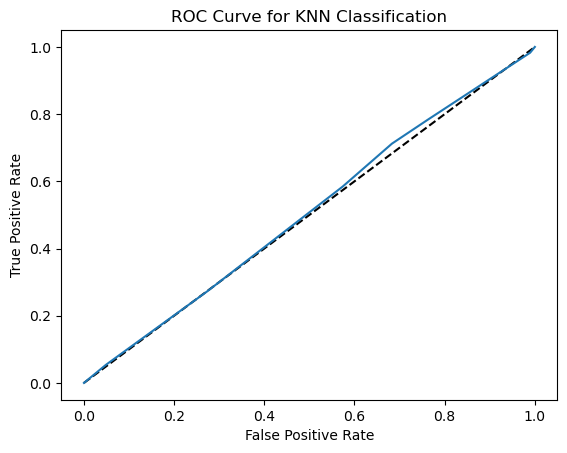

The Area Under the Curve (AUC) score is: 0.5077931929372455

              precision    recall  f1-score   support

           0       0.63      0.95      0.76      1899
           1       0.39      0.05      0.09      1101

    accuracy                           0.62      3000
   macro avg       0.51      0.50      0.43      3000
weighted avg       0.54      0.62      0.52      3000



In [25]:
# Create and plot the ROC curve and the Area Under the Curve Score
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

We can see here in both the chart and the AUC score of 51% that the model is essentially as good as random classification. 

### E2. Results and Implications

While the precision score of the model for predicting no readmission is 63%, the accuracy of the model and the AUC score show that the model is very poor at being a reliable tool for predicting a patient's readmission likelihood. This model in fact is less effective than the logistic regression model I made for the D208 performance assessment. Overall this KNN model is unable to tell us anything of use and should not be used to help predict readmission.

### E3. Limitations

The dataset being using here is limited in that it likely does not meet the assumption stated above for a KNN model to work accurately. That is the readmission occurance seems to have little to do with the variables that were taken for the dataset and therefore the assumpting that similar things exist near each other is not the case when it comes to this dataset. 

### E4. Course of Action

Since this model shows no good metric for classifying readmission for patients I have no course of action based on this dataset for the hospital. However I would suggest that a complete reframing of the data being obtained by the hospital would be a great place to start in finding ways to decrease readmission rates. Since the dataset that was collected has not been useful in the prediction of readmission I believe that working to reassess what data should be tracked and then setting up a study to create a whole new dataset with new variables would be the best course of action. 

### F. Panopto Video

[Panopto Video PA1, Natalie Toler](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4b75c790-6ff1-471e-9a2a-b1060128bf5a)

The video link is provided with submission.

## Sources
### G. Web Sources

Web sources used to create the code for this project were:

- D209 recorded webinars were used to create the code for the feature selection.
- D209 Datacamp pathway was used to help create most of the code used for this project.

### H. Source references

Other sources used for understanding and explaining the models and methods were:

- D209 Datacamp Courses
- [Its All About Assumptions](https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d)
- [Categorical Predictors](https://www.bzst.com/2015/08/categorical-predictors-how-many-dummies.html)